## Analyzing Sales Data to Improve Business Performance

#### Introduction
- The data contains; profit, sales, discount and state information.
- Analysis of the dataset was made to understand the business and find where to improve.

In [1]:
#Import packages and Reading Data
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.shape

(9994, 13)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
unique_countries = df['Country'].unique()
print(unique_countries)

['United States']


Looking at the data we have seen that the dataset is for United States, so I chose to drop the country column

In [8]:
df=df.drop(['Country'], axis=1).copy()

In [9]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
# Checking for missing values
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# Checking Ship Mode for duplicates
df.loc[df.duplicated(subset=['Postal Code'])].head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825


There are no duplicates of any interest because one customer from a specific postal code might have bought different iterms from the categories. 

### Profit analysis
- Profits by category and segment
- How to make more profit analysis

In [12]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

- To understand the top customers in our segment column the below bar chart was plotted.
- The results shows cunsumers are the top customers in the business.

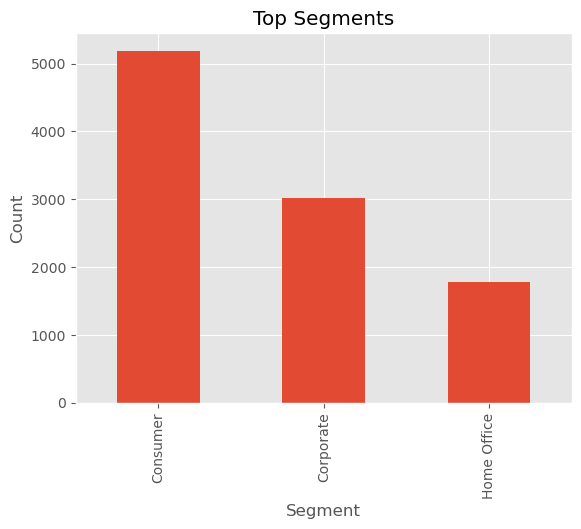

In [13]:
ax=df['Segment'].value_counts() \
    .plot(kind='bar', title='Top Segments')
ax.set_xlabel('Segment')
ax.set_ylabel('Count')
plt.show()

In [14]:
grouped = df.groupby(['Segment', 'Category'])['Profit'].sum().reset_index()
sorted_grouped = grouped.sort_values('Profit', ascending=False)
top_segment = sorted_grouped['Segment'].iloc[0]
top_category = sorted_grouped['Category'].iloc[0]

- To identify the segments and categories with the highest profits.
- To make more money the business has to focus more on Technology and Consumers

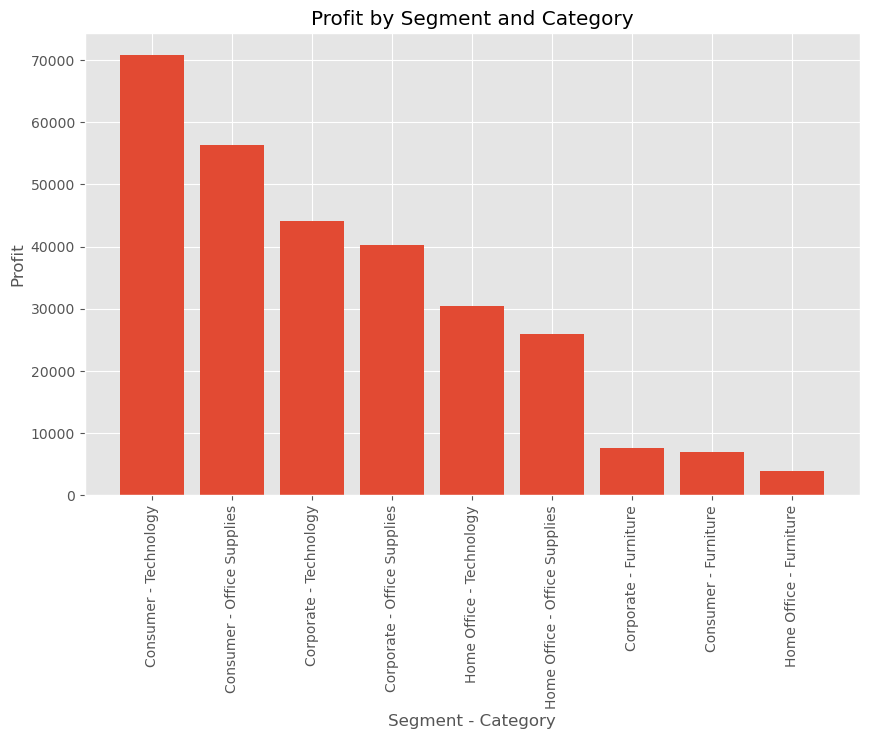

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_grouped['Segment'] + ' - ' + sorted_grouped['Category'], sorted_grouped['Profit'])
plt.xlabel('Segment - Category')
plt.ylabel('Profit')
plt.title('Profit by Segment and Category')
plt.xticks(rotation=90)
plt.show()

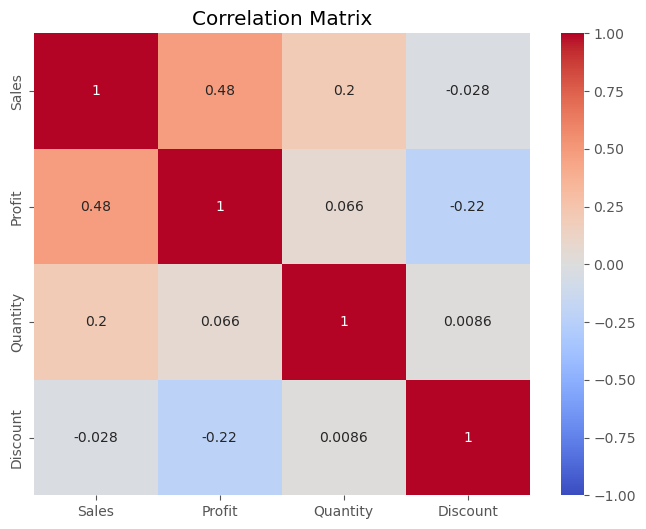

In [16]:
# Calculate the correlation matrix
corr_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- To understand if the quantity had an influence on discount a heatmap was created.
- Correlation coefficient suggests that there is no significant or meaningful association between "quantity" and "discount" in your dataset.
- There is high relationship between sales and profit.
- And a negation relationship between discount and profit.

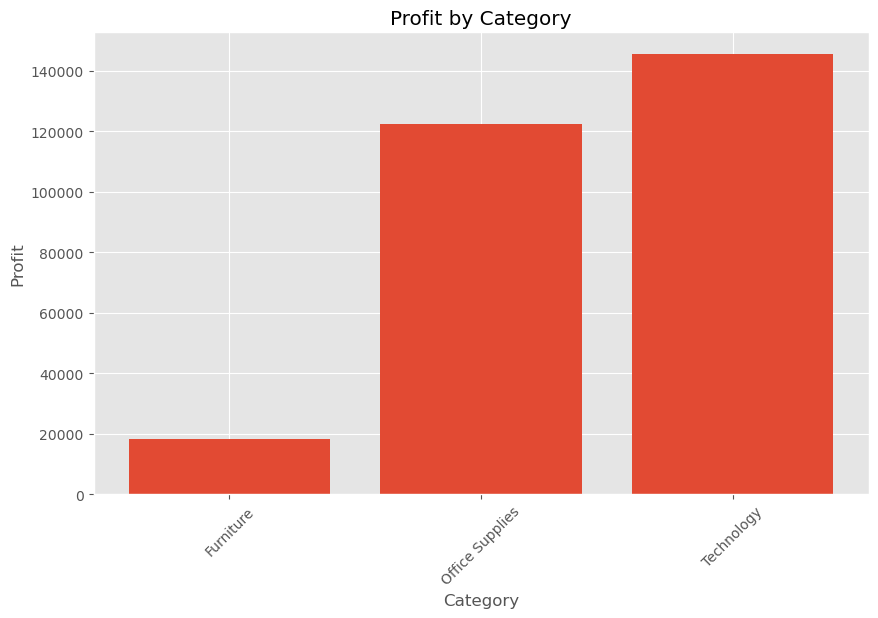

In [17]:
# total profit for each category
category_profit = df.groupby('Category')['Profit'].sum()

# bar plot for category profit
plt.figure(figsize=(10, 6))
plt.bar(category_profit.index, category_profit)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.xticks(rotation=45)
plt.show()

The Technology category has the highest profits.

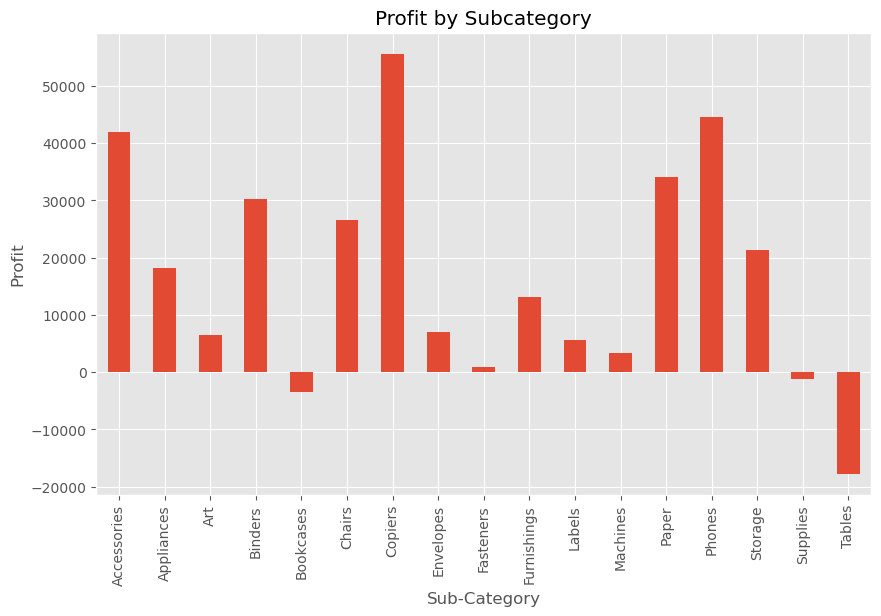

In [18]:
# total profit for each subcategory
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum()
#  axis
fig, ax = plt.subplots(figsize=(10, 6))
# bar plot for subcategory profit
subcategory_profit.plot(kind='bar', ax=ax)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Profit')
ax.set_title('Profit by Subcategory')

plt.show()

- In the category of Office appliances, Copiers is the most profitable subcategory.
- Tables, bookcases and Supplies are the least profitable subcategories.

### Sales Analysis
- The categories and sub-categories with the highest and lowest sales figures

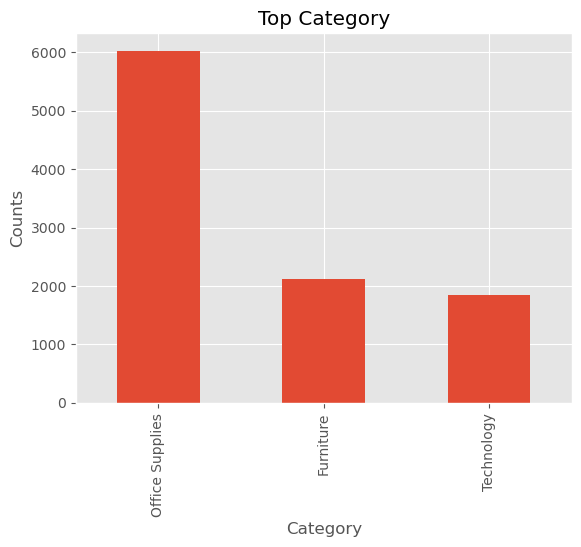

In [19]:
# Top category 
ax=df['Category'].value_counts().plot(kind='bar', title='Top Category')
ax.set_xlabel('Category')
ax.set_ylabel('Counts')
plt.show()

- Office supplies sells more than any other category.
- Blinders are the highest selling products in the Office supplies category.

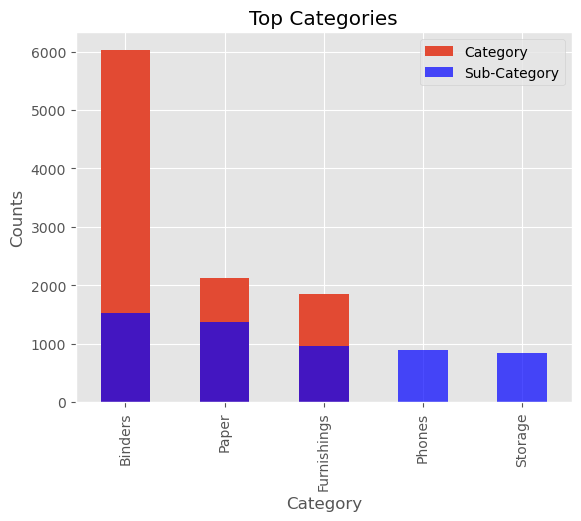

In [20]:
# top categories
top_categories = df['Category'].value_counts().head(5)  # Adjust the number as needed
ax = top_categories.plot(kind='bar', title='Top Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Counts')

# Plot subcategories
top_subcategories = df['Sub-Category'].value_counts().head(5)  # Adjust the number as needed
top_subcategories.plot(kind='bar', alpha=0.7, color='blue')

# Customize the plot
ax.legend(['Category', 'Sub-Category'])
plt.show()

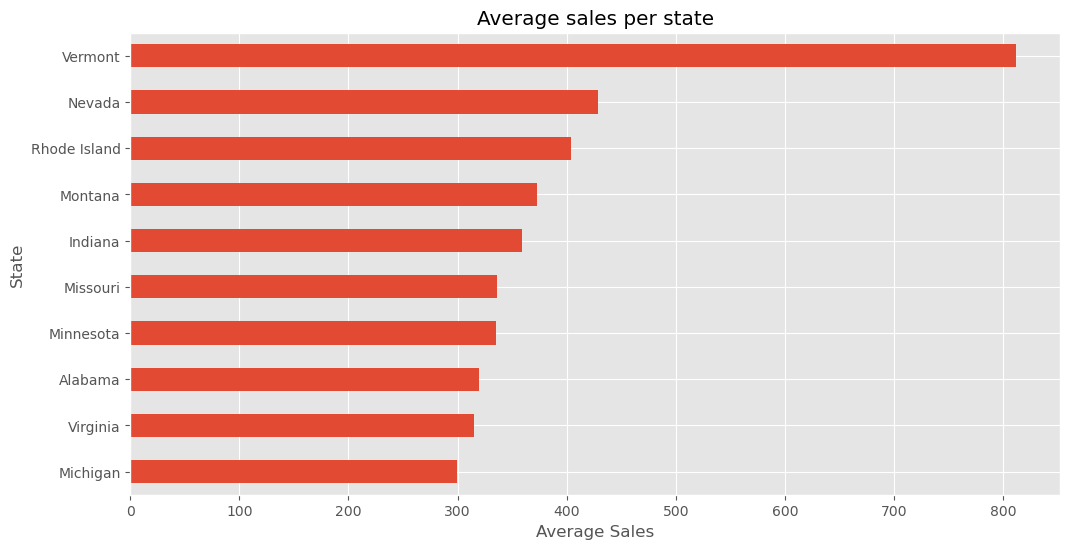

In [21]:
# find average sales per state
ax=df.query('State != "Other"')\
  .groupby('State')['Sales']\
  .agg(['mean','count'])\
  .query('count >= 10')\
  .sort_values('mean')\
  .tail(10)['mean']\
  .plot(kind='barh', figsize=(12,6), title='Average sales per state')

ax.set_xlabel('Average Sales')
plt.show()

#### What state had the highest sales and in which category?

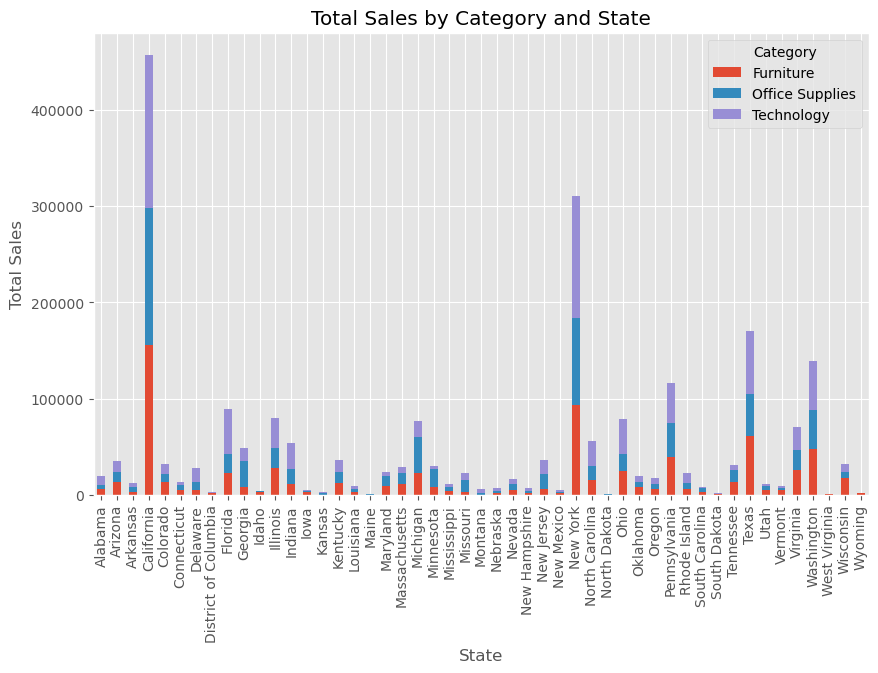

In [22]:
# Group the DataFrame by 'Category' and 'State' and calculate the sum of the 'Sales' column for each group
results = df.groupby(['Category', 'State']).sum()

# Create a pivot table with 'State' as the index, 'Category' as the columns, and 'Sales' as the values
# Fill any missing values with 0
pivot_table = results.pivot_table(index='State', columns='Category', values='Sales', fill_value=0)

# Create a stacked bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title, x-label, and y-label of the plot
plt.title('Total Sales by Category and State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

### Low Sales Analysis
- Categories or products with consistently low sales figures

In [23]:
lowest_sales = df['Sales'].min()
print(lowest_sales)

0.444


In [24]:
lowest_sales_index = df['Sales'].idxmin()
lowest_sales_row = df.loc[lowest_sales_index]
print(lowest_sales_row)

Ship Mode        Standard Class
Segment                Consumer
City                    Houston
State                     Texas
Postal Code               77095
Region                  Central
Category        Office Supplies
Sub-Category         Appliances
Sales                     0.444
Quantity                      1
Discount                    0.8
Profit                    -1.11
Name: 4101, dtype: object


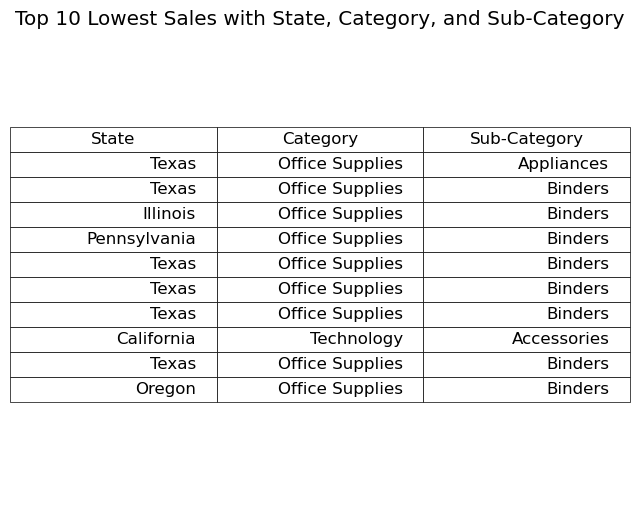

In [25]:
lowest_sales = df.nsmallest(10, 'Sales')[['State', 'Category', 'Sub-Category']]

fig, ax = plt.subplots(figsize=(8, 6))

table = ax.table(cellText=lowest_sales.values, colLabels=lowest_sales.columns, loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

ax.axis('off')

plt.title('Top 10 Lowest Sales with State, Category, and Sub-Category')

plt.show()

- Binders are selling low in Texas and other states. 
    - Accessories are selling low in Califorinia. 

### Profit Margin Analysis
- profit margins by product
- products with the highest and lowest profit margins

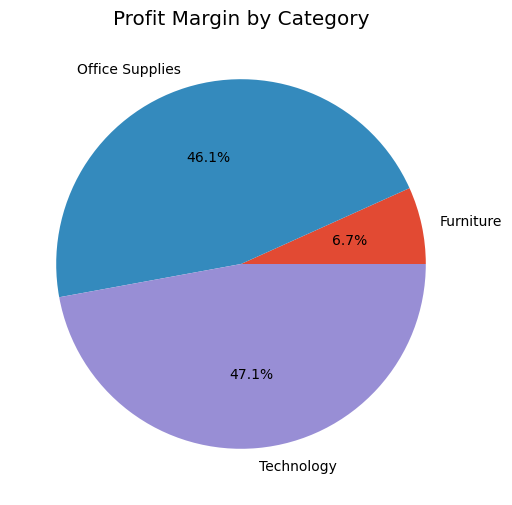

In [26]:
# total sales and profits for each category
results = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})

# profit margin percentage
results['Profit Margin'] = (results['Profit'] / results['Sales']) * 100

# pie chart to visualize the profit margins by category
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(results['Profit Margin'], labels=results.index, autopct='%1.1f%%')
ax.set_title('Profit Margin by Category')
plt.show()

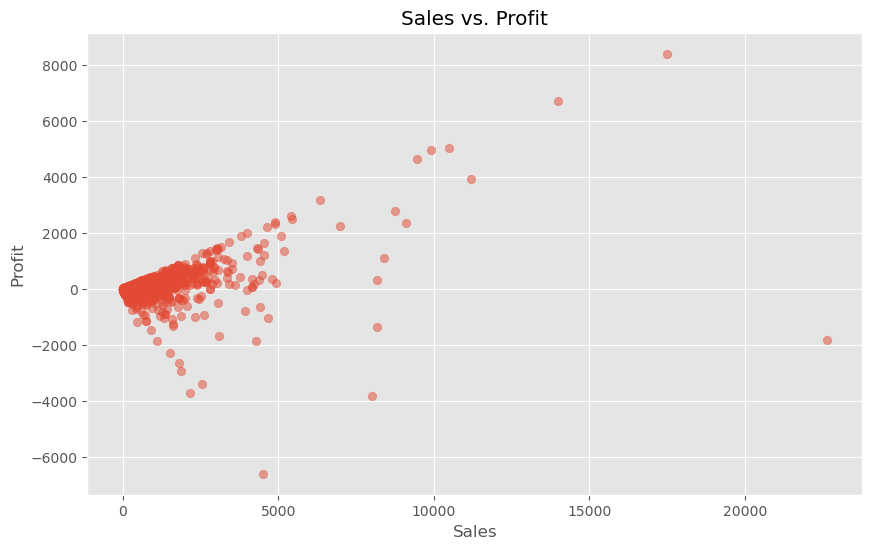

In [27]:
sales = df['Sales']
profit = df['Profit']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot of sales vs. profit
ax.scatter(sales, profit, alpha=0.5)

# Set the labels and title
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs. Profit')

plt.show()



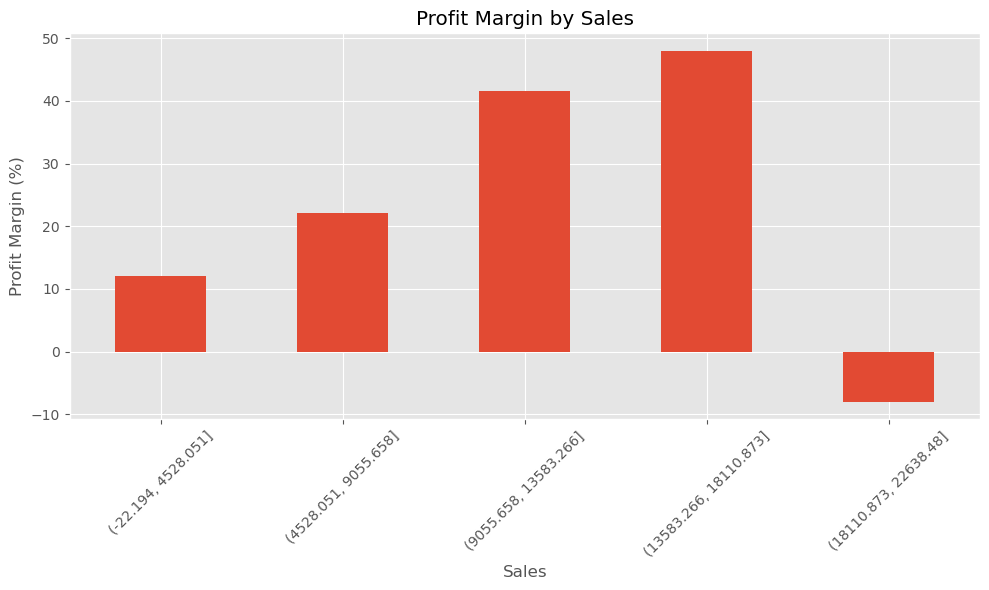

In [28]:
# the profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# divide sales into 5 equal-width bins
sales_groups = pd.cut(df['Sales'], bins=5)

# the mean profit margin for each sales group
profit_margin_by_sales = df.groupby(sales_groups)['Profit Margin'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
profit_margin_by_sales.plot(kind='bar', ax=ax)

ax.set_xlabel('Sales')
ax.set_ylabel('Profit Margin (%)')
ax.set_title('Profit Margin by Sales')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

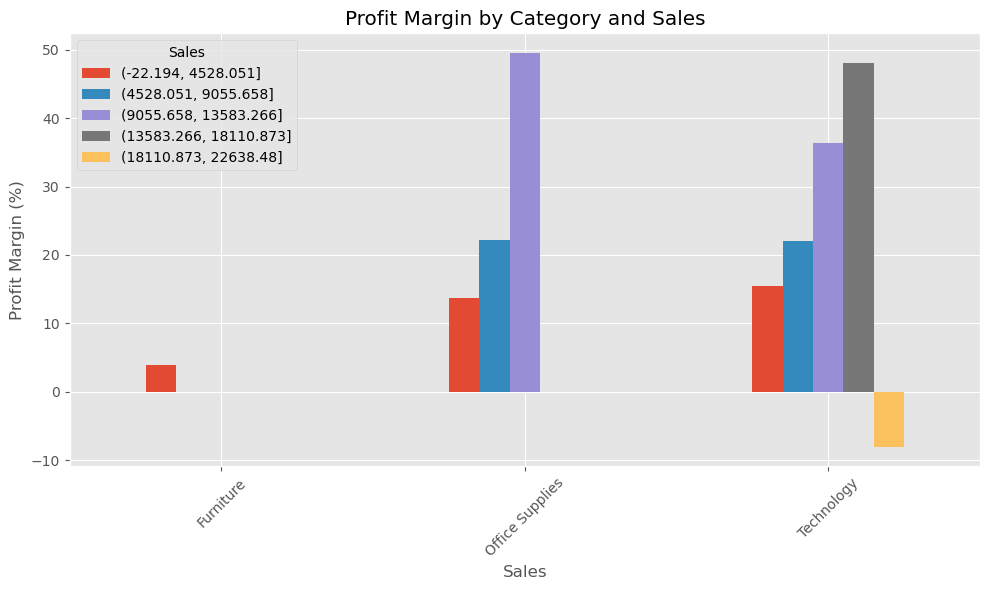

In [29]:

# Calculate the profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Group by category and sales
category_sales_groups = pd.cut(df['Sales'], bins=5)
category_sales_profit_margin = df.groupby(['Category', category_sales_groups])['Profit Margin'].mean()

# Reshape the data for plotting
profit_margin_by_category_sales = category_sales_profit_margin.unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
profit_margin_by_category_sales.plot(kind='bar', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Sales')
ax.set_ylabel('Profit Margin (%)')
ax.set_title('Profit Margin by Category and Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


### Conclusion
- The analysis will help make informed decision on what kind of products to focus on and which states. 
- It will be a perspective on which products to focus on 
- The above analysis has shown that; 
   - Binders are selling low in Texas and other states. 
   - Accessories are selling low in Califorinia.
   - Office supplies sells more than any other category.
- Blinders are the highest selling products in the Office supplies category.
   